In [ ]:
import numpy as np  

> **SOMETIMES THE QUESTIONS ARE COMPLICATED AND THE ANSWERS ARE SIMPLE **

>*Dr. Seuss*

## Coin Toss

You toss a coin 30 times and see head 24 times. Is it a fair coin?

**Hypothesis 1**: Tossing a fair coin will get you 15 heads in 30 tosses. This coin is biased

**Hypothesis 2**: Come on, even a fair coin could show 24 heads in 30 tosses. This is just by chance

#### Statistical Method

P(H) = ? 

P(HH) = ?

P(THH) = ?

Now, slightly tougher : P(2H, 1T) = ?

Generalizing, 

<img style="float: left;" src="/content/drive/MyDrive/Colab Notebooks/hackermath-master/img/binomial.gif">

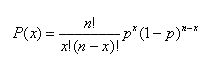



**What is the probability of getting 24 heads in 30 tosses ?**

It is the probability of getting heads 24 times or more. 

####  Approach

Simulation. Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is less than 5%, we conclude that the coin is biased. 

In [ ]:
total_tosses = 30
num_heads = 24
prob_head = 0.5

In [ ]:
#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)
experiment

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
print("Data of the Experiment:", experiment)

Data of the Experiment: [1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1]


In [ ]:
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1])  #This will give all the heads in the array

Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array
print("Number of heads in the experiment:", head_count)

Number of heads in the experiment: 14


In [ ]:
#Now, the above experiment needs to be repeated 100 times. Let's write a function and put the above code in a loop

def coin_toss_experiment(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0,2,total_tosses)
        head_count[times] = experiment[experiment==1].shape[0]
    
    return head_count

In [ ]:
head_count = coin_toss_experiment(100)

In [ ]:
head_count[:10] 

array([[15],
       [17],
       [15],
       [18],
       [20],
       [17],
       [17],
       [15],
       [11],
       [11]])

In [ ]:
print("Dimensions:", head_count.shape, "\n","Type of object:", type(head_count))

Dimensions: (100, 1) 
 Type of object: <class 'numpy.ndarray'>


In [ ]:
#Let's plot the above distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

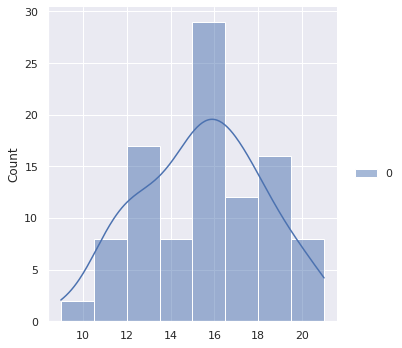

In [ ]:
sns.displot(head_count, kde=True)

**Exercise**: Try setting `kde=True` in the above cell and observe what happens

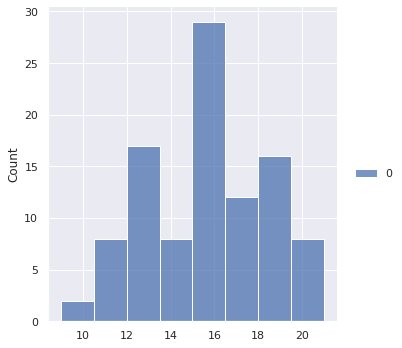

In [ ]:
sns.displot(head_count, kde=False)

In [ ]:
#Number of times the experiment returned 24 heads.
head_count[head_count>=24]

array([], dtype=int64)

In [ ]:
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 0
% of times with 24 or more heads:  0.0


####  Exercise: Repeat the experiment 100,000 times. 

# Is the coin fair?

### Extra pointers on numpy

**** Removing `for` loop in the funciton ****

#### Exercise: Benchmark `coin_toss_experiment` and `coin_toss_experiment_2` for 100 and 100,000 runs and report improvements, if any